In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

print('Módulos importados')

Módulos importados


In [ ]:
dataset_path = './archive/CLAHE_images'
categories = ['malignant', 'benign', 'normal']

In [ ]:
data = []
labels = []
max_images_per_category = 1000

for category in categories:
    category_path = os.path.join(dataset_path, category)
    images_loaded = 0
    for img_name in os.listdir(category_path):
        if images_loaded >= max_images_per_category:
            break
        img_path = os.path.join(category_path, img_name)
        try:
            img = load_img(img_path, target_size=(224, 224))  # Cambia el tamaño de la imagen si es necesario
            img_array = img_to_array(img)
            data.append(img_array)
            labels.append(category)
            images_loaded += 1
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")

data = np.array(data)
labels = np.array(labels)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels_encoded, test_size=0.2, random_state=42)


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

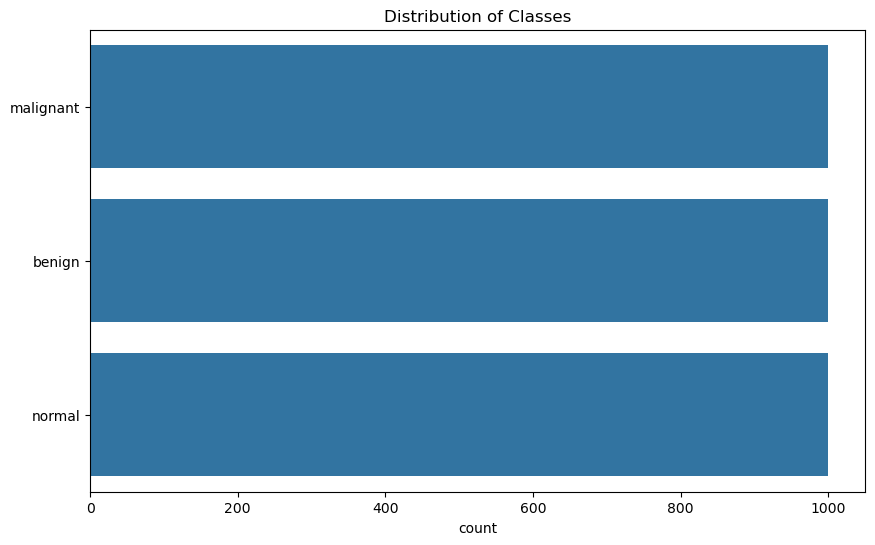

In [ ]:
# Show the distribution of the classes
plt.figure(figsize=(10, 6))
sns.countplot(labels)
plt.title('Distribution of Classes')
plt.show()

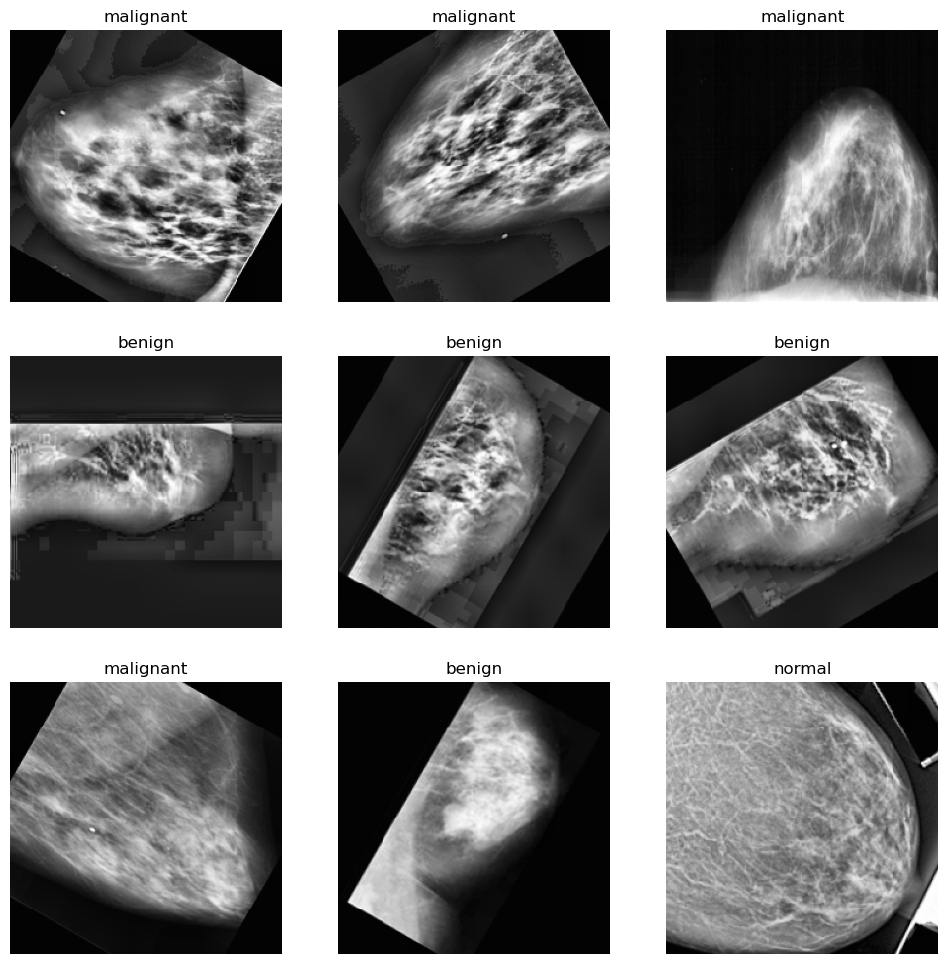

In [ ]:
def plot_sample_images(images, labels, categories, nrows=3, ncols=3):
    plt.figure(figsize=(12, 12))
    for i in range(nrows * ncols):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(images[i])
        plt.title(categories[labels[i]])
        plt.axis('off')
    plt.show()

plot_sample_images(X_train, y_train, label_encoder.classes_)


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

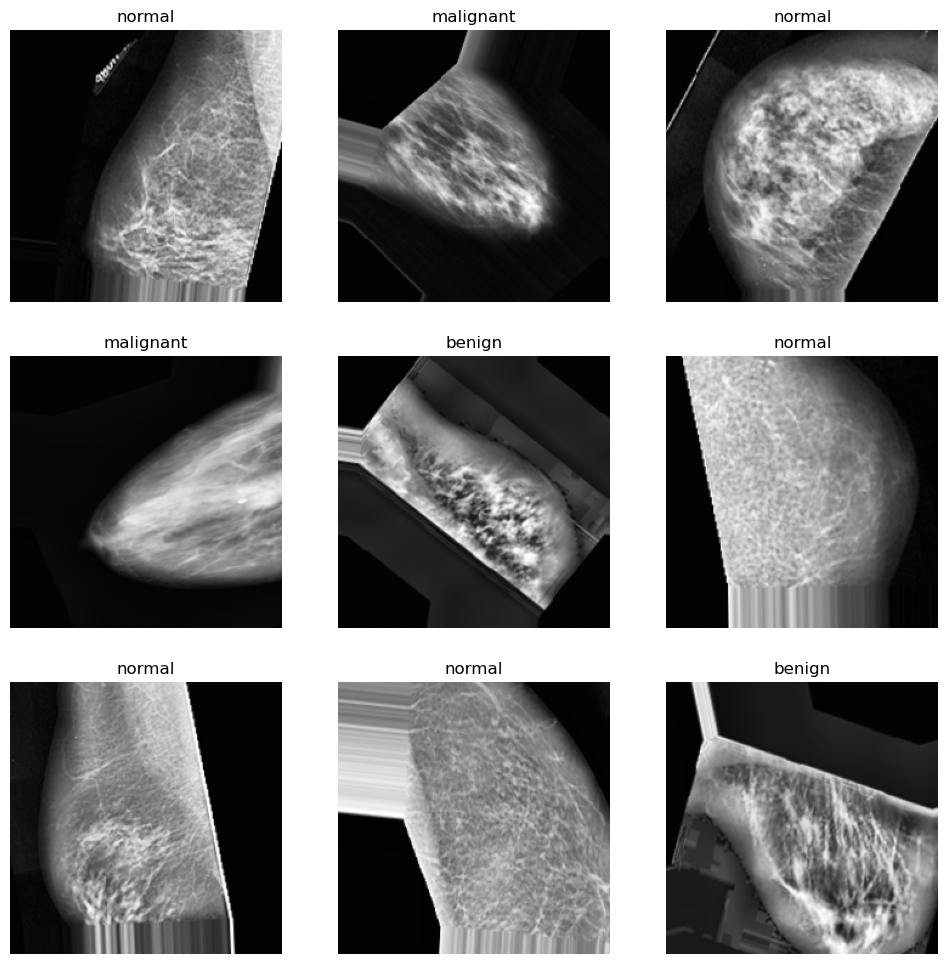

In [ ]:
datagen.fit(X_train)

augmented_images, augmented_labels = next(datagen.flow(X_train, y_train, batch_size=9))
plot_sample_images(augmented_images, augmented_labels, label_encoder.classes_)

## Modelo KNN

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import joblib


In [ ]:
data_flattened = data.reshape(data.shape[0], -1)

In [ ]:
DISTANCE = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
K = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
nExperimentos = 5

In [ ]:
columnas = ['DISTANCE', 'K', 'ACC', 'PRECISION', 'RECALL', 'F1-SCORE']
dataResultados = pd.DataFrame(columns=columnas)


In [ ]:
for idexp in range(nExperimentos):
    X_train, X_test, y_train, y_test = train_test_split(data_flattened, labels_encoded, test_size=0.2, random_state=42)

    for d in DISTANCE:
        for k in K:
            model = KNeighborsClassifier(n_neighbors=k, metric=d)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            ACC = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')

            valor = [d, k, ACC, precision, recall, f1]
            fila = pd.Series(valor, index=columnas)
            dataResultados = pd.concat([dataResultados, fila.to_frame().T], ignore_index=True)

dataResultados['K'] = dataResultados['K'].astype(int)
dataResultados['ACC'] = dataResultados['ACC'].astype(float)
dataResultados['PRECISION'] = dataResultados['PRECISION'].astype(float)
dataResultados['RECALL'] = dataResultados['RECALL'].astype(float)
dataResultados['F1-SCORE'] = dataResultados['F1-SCORE'].astype(float)
dataResultados = dataResultados.sort_values(by=['DISTANCE', 'K']).reset_index(drop=True)

print(dataResultados.head(10))

C:\Users\colla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\colla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\colla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\colla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedM

    DISTANCE   K   ACC  PRECISION  RECALL  F1-SCORE
0  chebyshev  10  0.55   0.447884    0.55  0.458793
1  chebyshev  10  0.55   0.447884    0.55  0.458793
2  chebyshev  10  0.55   0.447884    0.55  0.458793
3  chebyshev  10  0.55   0.447884    0.55  0.458793
4  chebyshev  10  0.55   0.447884    0.55  0.458793
5  chebyshev  20  0.50   0.459420    0.50  0.422820
6  chebyshev  20  0.50   0.459420    0.50  0.422820
7  chebyshev  20  0.50   0.459420    0.50  0.422820
8  chebyshev  20  0.50   0.459420    0.50  0.422820
9  chebyshev  20  0.50   0.459420    0.50  0.422820


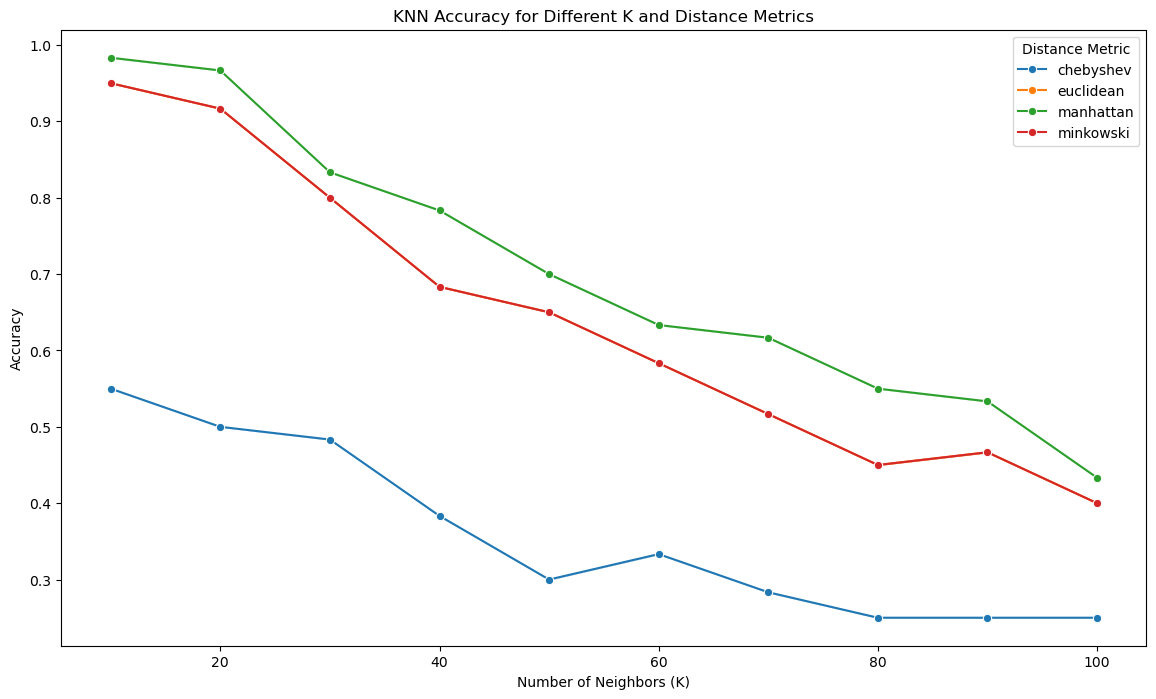

In [ ]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=dataResultados, x='K', y='ACC', hue='DISTANCE', marker='o')
plt.title('KNN Accuracy for Different K and Distance Metrics')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.legend(title='Distance Metric')
plt.show()


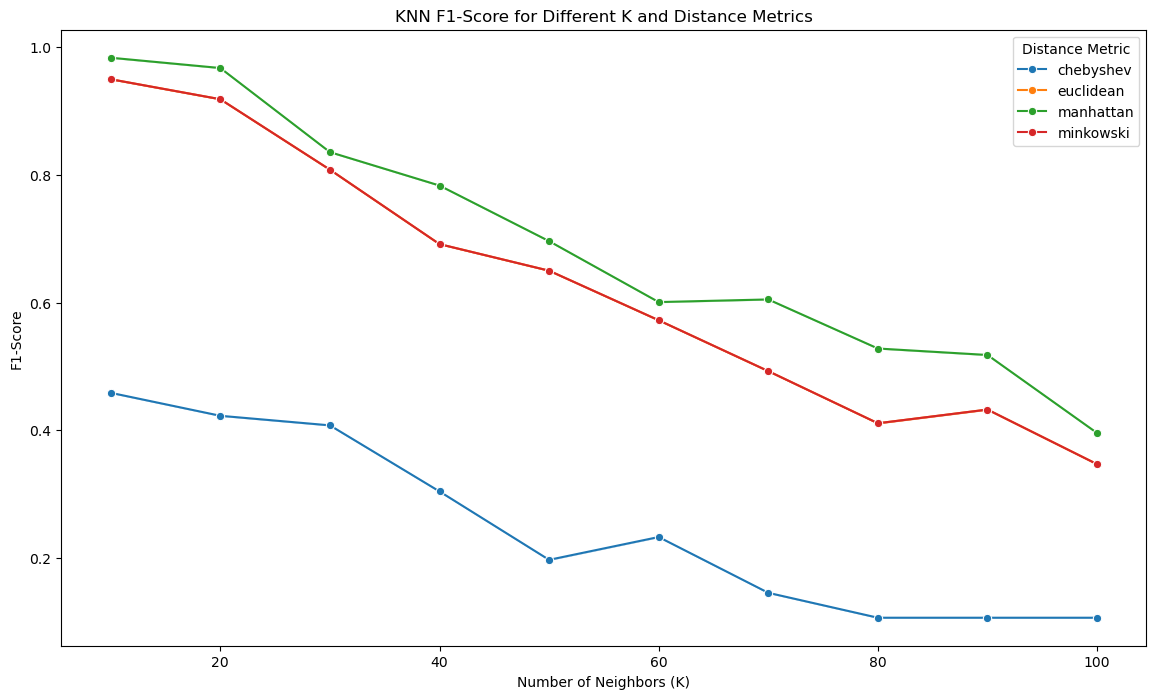

In [ ]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=dataResultados, x='K', y='F1-SCORE', hue='DISTANCE', marker='o')
plt.title('KNN F1-Score for Different K and Distance Metrics')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('F1-Score')
plt.legend(title='Distance Metric')
plt.show()

In [ ]:
#Filtrar por algunos valores de k
valoresK=[10,20,30,40,50,60,70,80,90,100]
dataResultados=dataResultados.loc[(dataResultados['K'].isin(valoresK))]
dataResultados.head(10)

,DISTANCE,K,ACC,PRECISION,RECALL,F1-SCORE
0,chebyshev,10,0.55,0.447884,0.55,0.458793
1,chebyshev,10,0.55,0.447884,0.55,0.458793
2,chebyshev,10,0.55,0.447884,0.55,0.458793
3,chebyshev,10,0.55,0.447884,0.55,0.458793
4,chebyshev,10,0.55,0.447884,0.55,0.458793
5,chebyshev,20,0.50,0.459420,0.50,0.422820
6,chebyshev,20,0.50,0.459420,0.50,0.422820
7,chebyshev,20,0.50,0.459420,0.50,0.422820
8,chebyshev,20,0.50,0.459420,0.50,0.422820
9,chebyshev,20,0.50,0.459420,0.50,0.422820


In [ ]:
dataResultados = dataResultados.groupby(['DISTANCE','K'])
dataResultados.head(5)

,DISTANCE,K,ACC,PRECISION,RECALL,F1-SCORE
0,chebyshev,10,0.55,0.447884,0.55,0.458793
1,chebyshev,10,0.55,0.447884,0.55,0.458793
2,chebyshev,10,0.55,0.447884,0.55,0.458793
3,chebyshev,10,0.55,0.447884,0.55,0.458793
4,chebyshev,10,0.55,0.447884,0.55,0.458793
...,...,...,...,...,...,...
195,minkowski,100,0.40,0.626807,0.40,0.347048
196,minkowski,100,0.40,0.626807,0.40,0.347048
197,minkowski,100,0.40,0.626807,0.40,0.347048
198,minkowski,100,0.40,0.626807,0.40,0.347048


In [ ]:
dataResultados = dataResultados.mean()
dataResultados = dataResultados.reset_index()
dataResultados = dataResultados.reset_index(drop=True)
dataResultados = dataResultados.groupby(['DISTANCE'])
dataResultados.head(5)

,DISTANCE,K,ACC,PRECISION,RECALL,F1-SCORE
0,chebyshev,10,0.550000,0.447884,0.550000,0.458793
1,chebyshev,20,0.500000,0.459420,0.500000,0.422820
2,chebyshev,30,0.483333,0.457447,0.483333,0.407831
3,chebyshev,40,0.383333,0.450327,0.383333,0.304375
4,chebyshev,50,0.300000,0.347727,0.300000,0.197291
10,euclidean,10,0.950000,0.951667,0.950000,0.949724
11,euclidean,20,0.916667,0.927193,0.916667,0.918409
12,euclidean,30,0.800000,0.852593,0.800000,0.808113
13,euclidean,40,0.683333,0.783794,0.683333,0.691584
14,euclidean,50,0.650000,0.767157,0.650000,0.649969


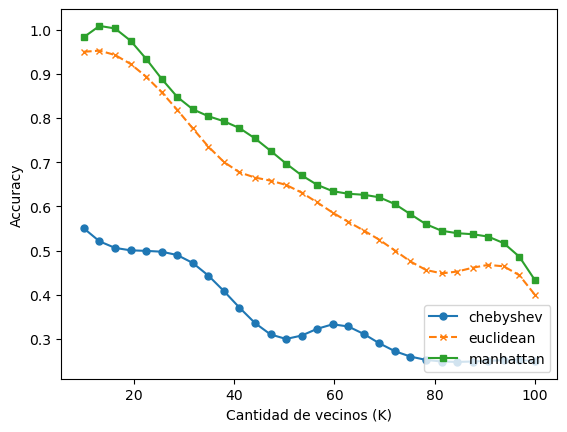

In [ ]:
from scipy.interpolate import make_interp_spline, BSpline
for name in dataResultados.groups.keys():
    group = dataResultados.get_group(name)
    #print(name)
    valores=group.ACC.values.tolist()
    #print(valores)
    #EFECTO SUAVIZADO: GENERAR PUNTOS CON UNA REGRESIÓN ENTRE LOS VALORES QUE TENEMOS
    numeroPuntos=len(valoresK)*3  #representa el número de puntos para generar entre T.min and T.max
    xnew = np.linspace(min(valoresK),max(valoresK),numeroPuntos) #linspace genera puntos en un rango
    spl = make_interp_spline(valoresK, valores, k=3) #BSpline object
    power_smooth = spl(xnew)
    if name=='euclidean': plt.plot(xnew, power_smooth, marker='x', linestyle='--', color='C1', ms=5, label = name)
    if name=='manhattan': plt.plot(xnew, power_smooth, marker='s', linestyle='-', color='C2', ms=5, label = name)
    if name=='propia': plt.plot(xnew, power_smooth, marker='o', linestyle='--', color='C9', ms=3, label = name)
    if name=='chebyshev': plt.plot(xnew, power_smooth, marker='.', linestyle='-', color='C0', ms=10, label = name)

    #plt.title("Resultados")
    plt.xlabel("Cantidad de vecinos (K)")   # Inserta el título del eje X
    plt.ylabel("Accuracy")   # Inserta el título del eje Y
    plt.legend(loc="lower right")

In [ ]:
#Construcción de modelo KNN
X_train, X_test, y_train, y_test = train_test_split(data_flattened, labels_encoded, test_size=0.2, random_state=42)
modelOr = KNeighborsClassifier(n_neighbors=19, metric='manhattan')
history = modelOr.fit(X_train, y_train)

print('Modelo entrenado')


Modelo entrenado


In [ ]:
y_pred = modelOr.predict(X_test)
ACC = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {ACC:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Accuracy: 0.9500
Precision: 0.9520
Recall: 0.9500
F1-Score: 0.9506


In [ ]:
# Save the trained model
def guardarModelo(modelo, nombre_archivo):
    joblib.dump(modelo, nombre_archivo + '.pkl')

guardarModelo(modelOr, 'modeloKNNOriginal')
print('Modelo Optimizado Guardado')

Modelo Optimizado Guardado


In [ ]:
# Example prediction for new images
def predict_new_images(modelo, image_paths):
    for img_path in image_paths:
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img)
        img_flattened = img_array.flatten().reshape(1, -1)
        prediction = modelo.predict(img_flattened)
        predicted_label = label_encoder.inverse_transform(prediction)[0]
        print(f'Image: {img_path}, Predicted Label: {predicted_label}')

# Replace these paths with paths to new images you want to predict
new_image_paths = [
    './archive/CLAHE_images/benign/benign876.png',
    './archive/CLAHE_images/benign/benign877.png',
    './archive/CLAHE_images/benign/benign878.png'
]

predict_new_images(modelOr, new_image_paths)

Image: ./archive/CLAHE_images/benign/benign876.png, Predicted Label: benign
Image: ./archive/CLAHE_images/benign/benign877.png, Predicted Label: benign
Image: ./archive/CLAHE_images/benign/benign878.png, Predicted Label: benign
